In [33]:
from google.colab import drive
import os

drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/CVPR_Dataset"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import numpy as np
import matplotlib.pyplot as plt


In [35]:
import cv2

In [36]:
from skimage.feature import hog

def extract_hog_features(image):
    features, _ = hog(image,
                      orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      block_norm='L2-Hys',
                      visualize=True)
    return features


In [62]:
def load_images_hog(folder, label, image_size=(128, 128)):
    features_list = []
    labels_list = []

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            hog_feat = extract_hog_features(img_gray)

            features_list.append(hog_feat)
            labels_list.append(label)
    return features_list, labels_list

folders = ["cats", "dogs", "panda"]
all_features = []
all_labels = []

for f in folders:
    folder_path = os.path.join(dataset_path, f)
    feats, lbls = load_images_hog(folder_path, f)
    all_features.extend(feats)
    all_labels.extend(lbls)

X = np.array(all_features)
y = np.array(all_labels)

print("Dataset loaded → Features shape:", X.shape, "| Total labels:", len(y))


Dataset loaded → Features shape: (300, 8100) | Total labels: 300


In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Classes:", le.classes_)


Classes: ['cats' 'dogs' 'panda']


Running Fold 1...


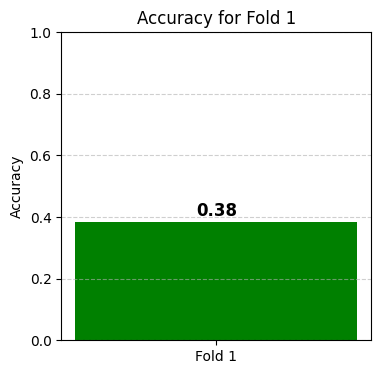

Running Fold 2...


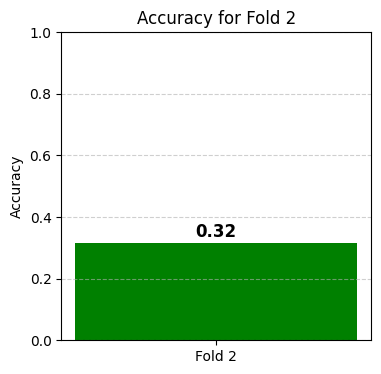

Running Fold 3...


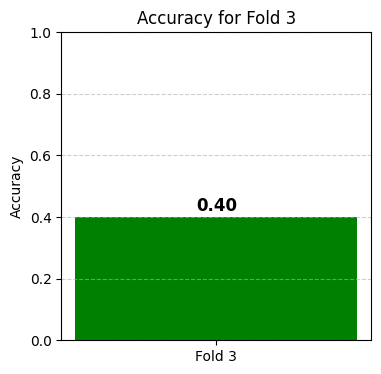

Running Fold 4...


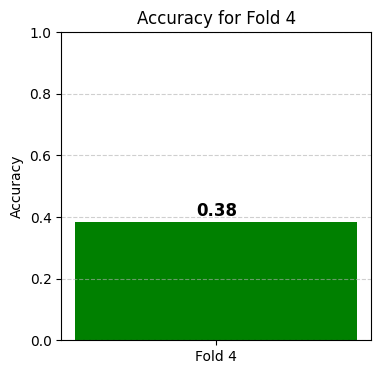

Running Fold 5...


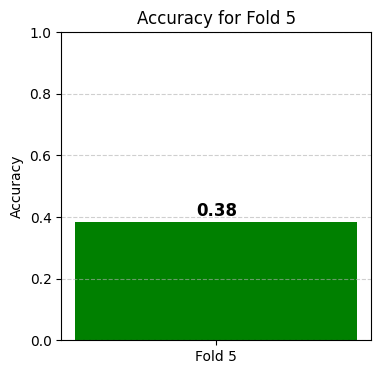

In [64]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
accuracies = []

for train_index, test_index in kf.split(X):
    print(f"Running Fold {fold}...")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    plt.figure(figsize=(4,4))
    bars = plt.bar([f"Fold {fold}"], [acc], color='green')
    plt.ylim(0,1)
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy for Fold {fold}")
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}",
                 ha='center', fontsize=12, fontweight='bold')

    plt.show()

    fold += 1



=== Overall Results ===
Accuracies per fold: [0.38333333333333336, 0.31666666666666665, 0.4, 0.38333333333333336, 0.38333333333333336]
Mean Accuracy: 0.37333333333333335


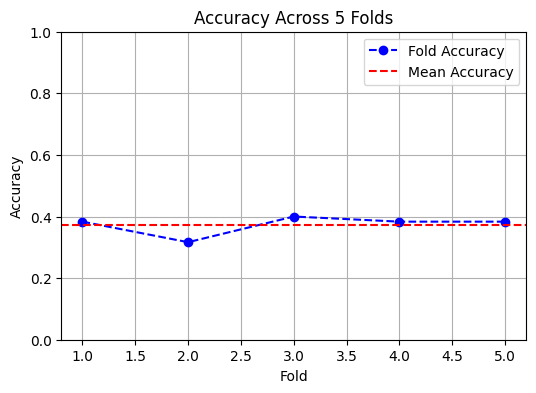

In [66]:
print("\n=== Overall Results ===")
print("Accuracies per fold:", accuracies)
print("Mean Accuracy:", np.mean(accuracies))

plt.figure(figsize=(6,4))
plt.plot(range(1,6), accuracies, marker='o', linestyle='--', color='blue', label="Fold Accuracy")
plt.axhline(np.mean(accuracies), color='red', linestyle='dashed', label="Mean Accuracy")
plt.title("Accuracy Across 5 Folds")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()


Running Fold 1...


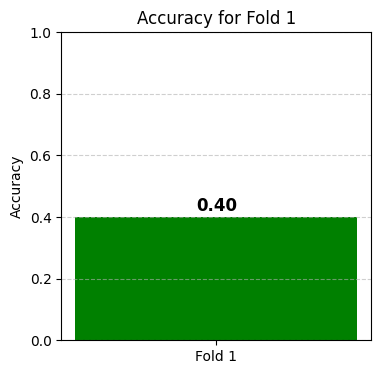

Running Fold 2...


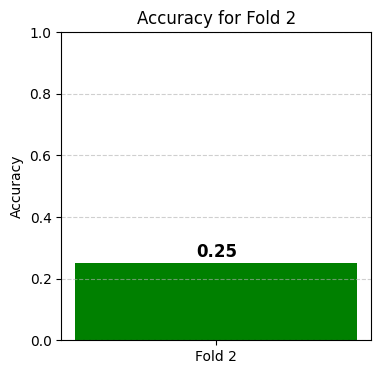

Running Fold 3...


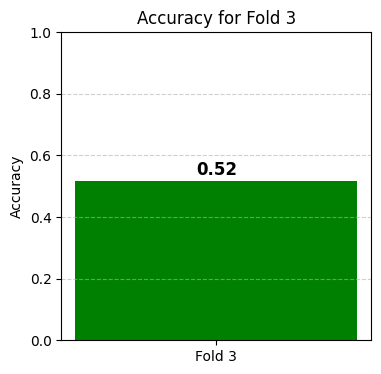

Running Fold 4...


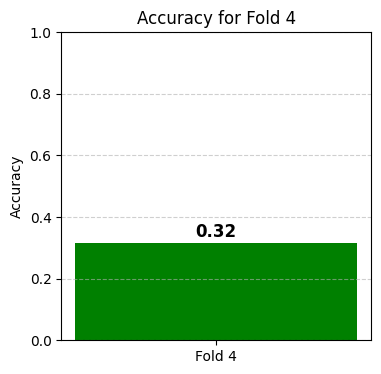

Running Fold 5...


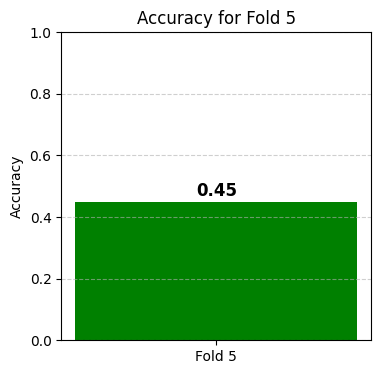

In [67]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
accuracies = []

for train_index, test_index in kf.split(X):
    print(f"Running Fold {fold}...")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    plt.figure(figsize=(4,4))
    bars = plt.bar([f"Fold {fold}"], [acc], color='green')
    plt.ylim(0,1)
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy for Fold {fold}")
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}",
                 ha='center', fontsize=12, fontweight='bold')

    plt.show()

    fold += 1



=== Overall Results ===
Accuracies per fold: [0.4, 0.25, 0.5166666666666667, 0.31666666666666665, 0.45]
Mean Accuracy: 0.38666666666666666


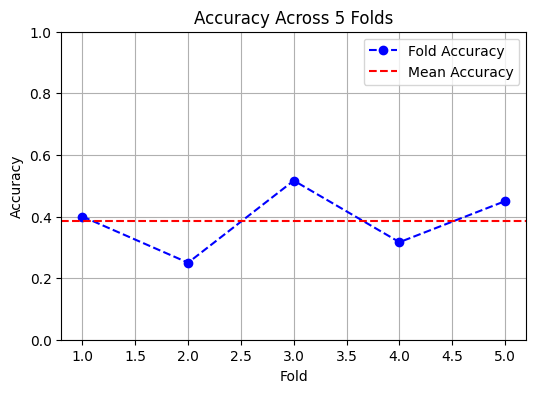

In [68]:
print("\n=== Overall Results ===")
print("Accuracies per fold:", accuracies)
print("Mean Accuracy:", np.mean(accuracies))

plt.figure(figsize=(6,4))
plt.plot(range(1,6), accuracies, marker='o', linestyle='--', color='blue', label="Fold Accuracy")
plt.axhline(np.mean(accuracies), color='red', linestyle='dashed', label="Mean Accuracy")
plt.title("Accuracy Across 5 Folds")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()


In [69]:
def load_images_hog(folder, label, image_size=(256, 256)):
    features_list = []
    labels_list = []

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            hog_feat = extract_hog_features(img_gray)

            features_list.append(hog_feat)
            labels_list.append(label)
    return features_list, labels_list

folders = ["cats", "dogs", "panda"]
all_features = []
all_labels = []

for f in folders:
    folder_path = os.path.join(dataset_path, f)
    feats, lbls = load_images_hog(folder_path, f)
    all_features.extend(feats)
    all_labels.extend(lbls)

X = np.array(all_features)
y = np.array(all_labels)

print("Dataset loaded → Features shape:", X.shape, "| Total labels:", len(y))


Dataset loaded → Features shape: (300, 34596) | Total labels: 300


In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Classes:", le.classes_)


Classes: ['cats' 'dogs' 'panda']


Running Fold 1...


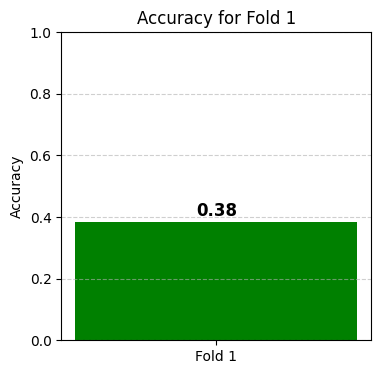

Running Fold 2...


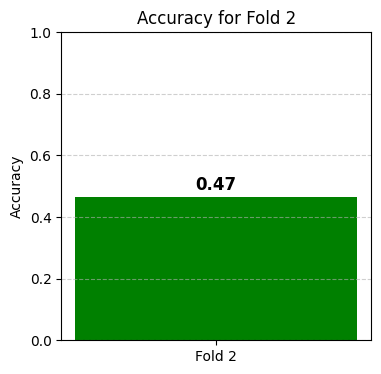

Running Fold 3...


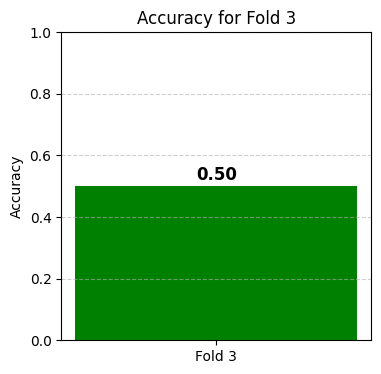

Running Fold 4...


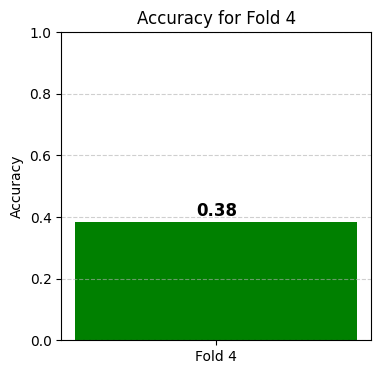

Running Fold 5...


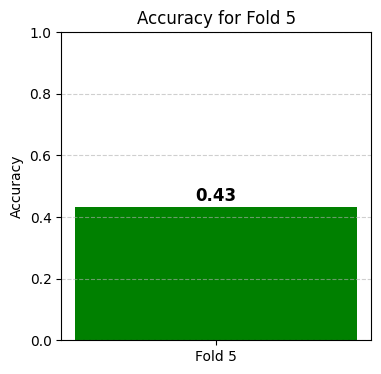

In [72]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
accuracies = []

for train_index, test_index in kf.split(X):
    print(f"Running Fold {fold}...")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    plt.figure(figsize=(4,4))
    bars = plt.bar([f"Fold {fold}"], [acc], color='green')
    plt.ylim(0,1)
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy for Fold {fold}")
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}",
                 ha='center', fontsize=12, fontweight='bold')

    plt.show()

    fold += 1



=== Overall Results ===
Accuracies per fold: [0.38333333333333336, 0.4666666666666667, 0.5, 0.38333333333333336, 0.43333333333333335]
Mean Accuracy: 0.4333333333333334


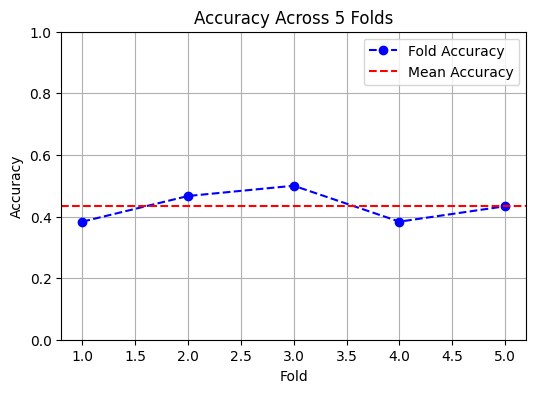

In [73]:
print("\n=== Overall Results ===")
print("Accuracies per fold:", accuracies)
print("Mean Accuracy:", np.mean(accuracies))

plt.figure(figsize=(6,4))
plt.plot(range(1,6), accuracies, marker='o', linestyle='--', color='blue', label="Fold Accuracy")
plt.axhline(np.mean(accuracies), color='red', linestyle='dashed', label="Mean Accuracy")
plt.title("Accuracy Across 5 Folds")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()



=== Overall Results ===
Accuracies per fold: [0.38333333333333336, 0.4666666666666667, 0.5, 0.38333333333333336, 0.43333333333333335]
Mean Accuracy: 0.4333333333333334


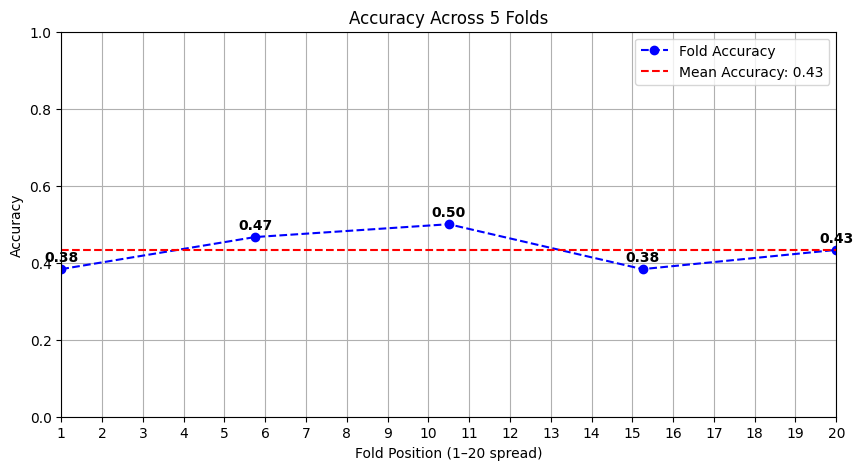

In [74]:
print("\n=== Overall Results ===")
print("Accuracies per fold:", accuracies)
mean_acc = np.mean(accuracies)
print("Mean Accuracy:", mean_acc)

x_folds = np.linspace(1, 20, num=5)

plt.figure(figsize=(10, 5))
plt.plot(x_folds, accuracies, marker='o', linestyle='--', color='blue', label="Fold Accuracy")
plt.axhline(mean_acc, color='red', linestyle='dashed', label=f"Mean Accuracy: {mean_acc:.2f}")

for x, y in zip(x_folds, accuracies):
    plt.text(x, y + 0.02, f"{y:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.title("Accuracy Across 5 Folds")
plt.xlabel("Fold Position (1–20 spread)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(1, 20)
plt.xticks(np.arange(1, 21, 1))

plt.grid(True)
plt.legend()
plt.show()
